In [105]:
from matplotlib import pyplot as plt
import pandas as pd
import os.path as op
import mne
import scipy.io
import os
from mne.io import read_epochs_fieldtrip
from mne import create_info
import numpy as np
from burst_detection import extract_bursts
from burst_detection import extract_bursts_single_trial
from fooof import FOOOF
import mat73

In [106]:
base_dir = r'C:\Users\mgautier\Desktop\DEVMOBETA\eeg_data\devmobeta\data'
subjects = pd.read_csv(op.join(base_dir, 'participants.tsv'), sep='\t')
subject_ids = subjects['participant_id']
pipeline='NEARICA_NF'
age='twelve'
ch_names = ['E35', 'E30', 'E36', 'E42','E41', 'E37', 'E104', 'E105', 'E103','E110','E87','E93']
sfreq = 512
info = create_info(ch_names, sfreq, ch_types='eeg', verbose=None)

for subject_id in subject_ids:
    path = op.join(base_dir, 'derivatives', pipeline,age, subject_id, '05_final_zapped_data')
    if os.path.exists(op.join(path, '%s_task-grasping_eeg_final_zapped_old_new.set' %(subject_id))):
        superlet_path=op.join(base_dir, 'derivatives', pipeline,age, subject_id)
        epochs = mne.read_epochs_eeglab(op.join(path, '%s_task-grasping_eeg_final_zapped_old_new.set'%(subject_id)))
        times = epochs.times
        trials = epochs.get_data()[:, 11, :]
        
        superlets= mat73.loadmat(op.join(superlet_path,'%s_processed_superlet_tf.mat'%(subject_id)))
        trial_tf = superlets['trial_tf']
        foi=superlets['foi']
        ch_idx=36
        
        average_psd = np.mean(trial_tf[:,:,ch_idx,:], axis=(2, 0))
        trial_tf=trial_tf[:,:,ch_idx,:]
        
        search_range = np.where((foi >= 10) & (foi <= 33))[0]
        beta_lims = [13, 30]
        
        ff = FOOOF()
        ff.fit(foi, average_psd, [1, 120])
        ap = 10 ** ff._ap_fit 
        
        bursts = extract_bursts(
        trials, trial_tf[:,search_range], times, 
        foi[search_range], beta_lims, 
        ap[search_range].reshape(-1, 1), sfreq, remove_fooof=True)
        
    else: 
        continue

Extracting parameters from C:\Users\mgautier\Desktop\DEVMOBETA\eeg_data\devmobeta\data\derivatives\NEARICA_NF\twelve\sub-203\05_final_zapped_data\sub-203_task-grasping_eeg_final_zapped_old_new.set...
Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
Ready.


C:\Users\mgautier\AppData\Local\Temp/ipykernel_8772/3235733013.py:14: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(op.join(path, '%s_task-grasping_eeg_final_zapped_old_new.set' %(subject_id) ))



FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.71 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.



C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (249) is longer than the signal (248), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (499) is longer than the signal (118), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (379) is longer than the signal (202), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (365) is longer than the signal (118), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filt

		Skipping trial 7 because there don't exist any above-threshold values.
		Skipping trial 8 because there don't exist any above-threshold values.


C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (279) is longer than the signal (182), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (327) is longer than the signal (148), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (231) is longer than the signal (120), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (395) is longer than the signal (96), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filte

Extracting parameters from C:\Users\mgautier\Desktop\DEVMOBETA\eeg_data\devmobeta\data\derivatives\NEARICA_NF\twelve\sub-207\05_final_zapped_data\sub-207_task-grasping_eeg_final_zapped_old_new.set...
Not setting metadata
19 matching events found
No baseline correction applied
0 projection items activated
Ready.


C:\Users\mgautier\AppData\Local\Temp/ipykernel_8772/3235733013.py:14: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab(op.join(path, '%s_task-grasping_eeg_final_zapped_old_new.set' %(subject_id) ))



FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.71 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.



C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (287) is longer than the signal (240), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (231) is longer than the signal (200), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (279) is longer than the signal (154), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (279) is longer than the signal (264), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filt

		Skipping trial 4 because there don't exist any above-threshold values.


C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (413) is longer than the signal (166), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (379) is longer than the signal (36), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (451) is longer than the signal (104), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (379) is longer than the signal (146), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filte

Extracting parameters from C:\Users\mgautier\Desktop\DEVMOBETA\eeg_data\devmobeta\data\derivatives\NEARICA_NF\twelve\sub-208\05_final_zapped_data\sub-208_task-grasping_eeg_final_zapped_old_new.set...


C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (307) is longer than the signal (72), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (297) is longer than the signal (90), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (279) is longer than the signal (90), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (475) is longer than the signal (84), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_l

Not setting metadata
46 matching events found
No baseline correction applied
0 projection items activated
Ready.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.71 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.



C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (451) is longer than the signal (146), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (243) is longer than the signal (226), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (499) is longer than the signal (342), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (451) is longer than the signal (124), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filt

		Skipping trial 14 because there don't exist any above-threshold values.


C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (351) is longer than the signal (188), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (237) is longer than the signal (144), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (271) is longer than the signal (156), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (475) is longer than the signal (66), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filte

Extracting parameters from C:\Users\mgautier\Desktop\DEVMOBETA\eeg_data\devmobeta\data\derivatives\NEARICA_NF\twelve\sub-203\05_final_zapped_data\sub-203_task-grasping_eeg_final_zapped_old_new.set...


C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (431) is longer than the signal (74), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (431) is longer than the signal (232), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (249) is longer than the signal (126), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (249) is longer than the signal (160), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filte

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
Ready.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.71 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.



C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (249) is longer than the signal (248), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (499) is longer than the signal (118), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (379) is longer than the signal (202), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (365) is longer than the signal (118), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filt

		Skipping trial 7 because there don't exist any above-threshold values.
		Skipping trial 8 because there don't exist any above-threshold values.


C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (231) is longer than the signal (120), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (395) is longer than the signal (96), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (395) is longer than the signal (96), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (395) is longer than the signal (90), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_

Extracting parameters from C:\Users\mgautier\Desktop\DEVMOBETA\eeg_data\devmobeta\data\derivatives\NEARICA_NF\twelve\sub-207\05_final_zapped_data\sub-207_task-grasping_eeg_final_zapped_old_new.set...
Not setting metadata


C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (243) is longer than the signal (126), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (243) is longer than the signal (92), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (379) is longer than the signal (136), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (351) is longer than the signal (196), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filte

19 matching events found
No baseline correction applied
0 projection items activated
Ready.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.71 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.



C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (287) is longer than the signal (240), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (231) is longer than the signal (200), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (279) is longer than the signal (154), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (279) is longer than the signal (264), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filt

		Skipping trial 4 because there don't exist any above-threshold values.


C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (351) is longer than the signal (104), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (451) is longer than the signal (90), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (351) is longer than the signal (92), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (271) is longer than the signal (96), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_

Extracting parameters from C:\Users\mgautier\Desktop\DEVMOBETA\eeg_data\devmobeta\data\derivatives\NEARICA_NF\twelve\sub-208\05_final_zapped_data\sub-208_task-grasping_eeg_final_zapped_old_new.set...


C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (317) is longer than the signal (116), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (413) is longer than the signal (58), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (287) is longer than the signal (58), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (279) is longer than the signal (64), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_

Not setting metadata
46 matching events found
No baseline correction applied
0 projection items activated
Ready.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.71 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.



C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (451) is longer than the signal (146), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (243) is longer than the signal (226), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (499) is longer than the signal (342), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (451) is longer than the signal (124), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filt

		Skipping trial 14 because there don't exist any above-threshold values.


C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (249) is longer than the signal (158), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (475) is longer than the signal (90), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (351) is longer than the signal (122), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (431) is longer than the signal (84), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter

Extracting parameters from C:\Users\mgautier\Desktop\DEVMOBETA\eeg_data\devmobeta\data\derivatives\NEARICA_NF\twelve\sub-207\05_final_zapped_data\sub-207_task-grasping_eeg_final_zapped_old_new.set...
Not setting metadata


C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (249) is longer than the signal (160), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (249) is longer than the signal (126), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (431) is longer than the signal (148), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (327) is longer than the signal (152), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filt

19 matching events found
No baseline correction applied
0 projection items activated
Ready.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.71 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.



C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (287) is longer than the signal (240), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (231) is longer than the signal (200), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (279) is longer than the signal (154), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (279) is longer than the signal (264), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filt

		Skipping trial 4 because there don't exist any above-threshold values.


C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (317) is longer than the signal (108), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (395) is longer than the signal (110), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (249) is longer than the signal (182), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (379) is longer than the signal (76), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filte

Extracting parameters from C:\Users\mgautier\Desktop\DEVMOBETA\eeg_data\devmobeta\data\derivatives\NEARICA_NF\twelve\sub-208\05_final_zapped_data\sub-208_task-grasping_eeg_final_zapped_old_new.set...


C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (317) is longer than the signal (116), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (413) is longer than the signal (58), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (287) is longer than the signal (58), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (279) is longer than the signal (64), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_

Not setting metadata
46 matching events found
No baseline correction applied
0 projection items activated
Ready.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.71 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.



C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (451) is longer than the signal (146), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (243) is longer than the signal (226), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (499) is longer than the signal (342), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (451) is longer than the signal (124), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filt

		Skipping trial 14 because there don't exist any above-threshold values.


C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (475) is longer than the signal (90), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (351) is longer than the signal (122), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (431) is longer than the signal (84), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (317) is longer than the signal (64), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_

Extracting parameters from C:\Users\mgautier\Desktop\DEVMOBETA\eeg_data\devmobeta\data\derivatives\NEARICA_NF\twelve\sub-203\05_final_zapped_data\sub-203_task-grasping_eeg_final_zapped_old_new.set...


C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (431) is longer than the signal (232), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (249) is longer than the signal (126), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (249) is longer than the signal (160), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (249) is longer than the signal (126), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filt

Not setting metadata
17 matching events found
No baseline correction applied
0 projection items activated
Ready.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.71 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.



C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (249) is longer than the signal (248), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (499) is longer than the signal (118), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (379) is longer than the signal (202), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (365) is longer than the signal (118), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filt

		Skipping trial 7 because there don't exist any above-threshold values.
		Skipping trial 8 because there don't exist any above-threshold values.


C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (327) is longer than the signal (106), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (395) is longer than the signal (58), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (395) is longer than the signal (110), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter_length (249) is longer than the signal (96), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = filter_data(
C:\Users\mgautier\Projects\eeg\analysis\burst_detection.py:421: RuntimeWarning: filter

In [107]:
bursts.keys()

dict_keys(['trial', 'waveform', 'peak_freq', 'peak_amp_iter', 'peak_amp_base', 'peak_time', 'peak_adjustment', 'fwhm_freq', 'fwhm_time', 'polarity', 'waveform_times'])

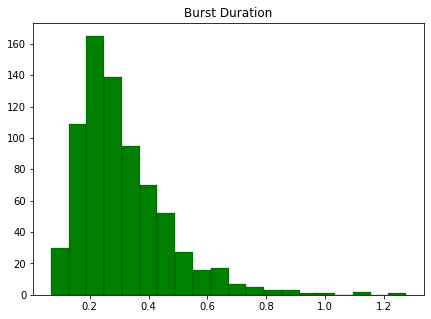

In [108]:
f, ax = plt.subplots(1,1, figsize=(7, 5))
ax.hist(bursts["fwhm_time"], bins=20, color="#008000", edgecolor='black', linewidth=0.2);
ax.set_title("Burst Duration");

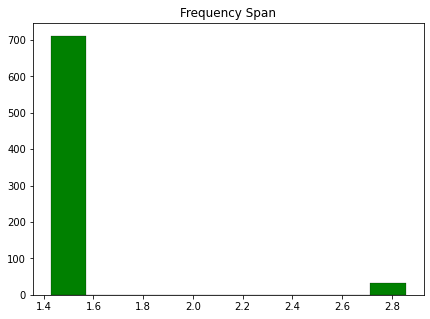

In [109]:
f, ax = plt.subplots(1,1, figsize=(7, 5))
ax.hist(bursts["fwhm_freq"], bins=10, color="#008000", edgecolor='black', linewidth=0.2);
ax.set_title("Frequency Span");

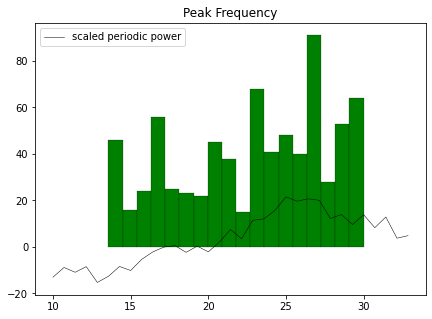

In [110]:
f, ax = plt.subplots(1,1, figsize=(7, 5))
ax.hist(bursts["peak_freq"], bins=18, color="#008000", edgecolor='black', linewidth=0.2)
ax.plot(foi[search_range], residual_search_power*0.75e2, lw=0.5, c="black", label="scaled periodic power")
ax.legend()
ax.set_title("Peak Frequency");

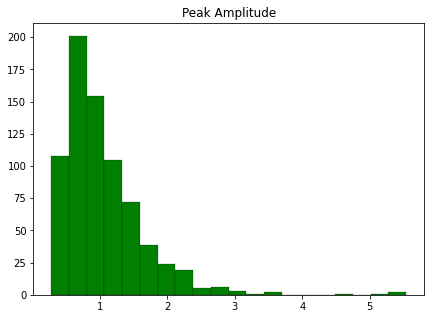

In [111]:
f, ax = plt.subplots(1,1, figsize=(7, 5))
ax.hist(bursts["peak_amp_base"], bins=20, color="#008000", edgecolor='black', linewidth=0.2);
ax.set_title("Peak Amplitude");

(-20.0, 20.0)

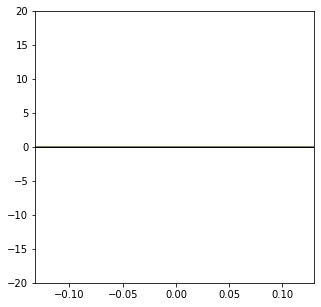

In [112]:
f, ax = plt.subplots(1,1, figsize=(5, 5))
mean_waveform = np.mean(bursts["waveform"], axis=0)
ax.plot(bursts["waveform_times"], bursts["waveform"].T, lw=0.2);
ax.plot(bursts["waveform_times"], mean_waveform, lw=1, c="black");
ax.set_xlim(bursts["waveform_times"][0], bursts["waveform_times"][-1])
ax.set_ylim(-20, 20)

IndexError: index 10 is out of bounds for axis 0 with size 7

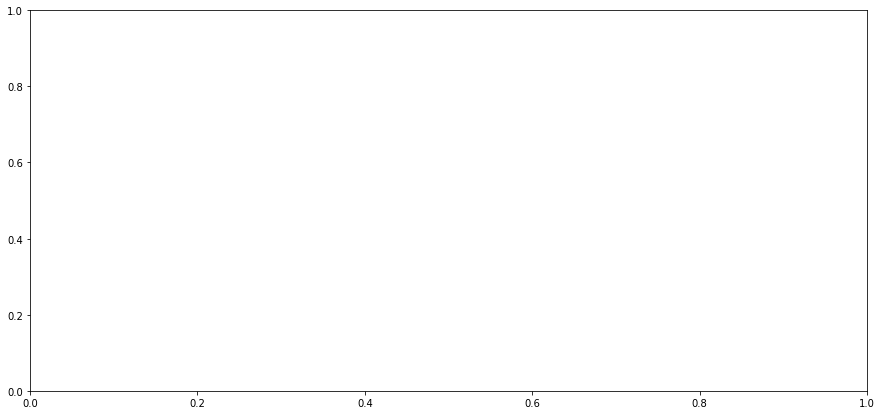

In [97]:
trial = 10
tr_map = bursts["trial"] == trial
f, ax = plt.subplots(1,1, figsize=(15, 7))
spectrum = ax.imshow(trial_tf[trial][search_range], cmap="Wistia", origin="lower", extent=(times[0], times[-1], foi[search_range][0], foi[search_range][-1]), aspect="auto")
ax.scatter(bursts["peak_time"][tr_map], bursts["peak_freq"][tr_map], s=10, marker="+", c="black")
ax.axhline(beta_lims[0], lw=0.5, c="black")
ax.axhline(beta_lims[1], lw=0.5, c="black")
plt.colorbar(spectrum, ax=ax)
plt.tight_layout()